In [ ]:
#!unzip "/content/drive/MyDrive/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog-breed-identification"

In [2]:
#!pip uninstall -y tensorflow tensorflow-hub dopamine-rl tf-keras jax
#!rm -rf /tmp/tfhub_modules
#
## 2. تثبيت الإصدارات المتوافقة
#!pip install tensorflow==2.15.0 tensorflow-hub==0.15.0 --no-deps
#!pip install tensorflow-estimator==2.15.0
#
## 3. إعادة تشغيل البيئة (إجباري)
#import IPython
#IPython.Application.instance().kernel.do_shutdown(True)
!pip install tensorflow==2.15.0 tensorflow-hub==0.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing install

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print(f"TensorFlow: {tf.__version__}")  # يجب أن يكون 2.15.0
print(f"TF Hub: {hub.__version__}")     # يجب أن يكون 0.15.0

TensorFlow: 2.18.0
TF Hub: 0.16.1


In [ ]:
import pandas as pd
label_csv=pd.read_csv("drive/MyDrive/Data/dog-breed-identification/labels.csv")
print(label_csv.describe())
print(label_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

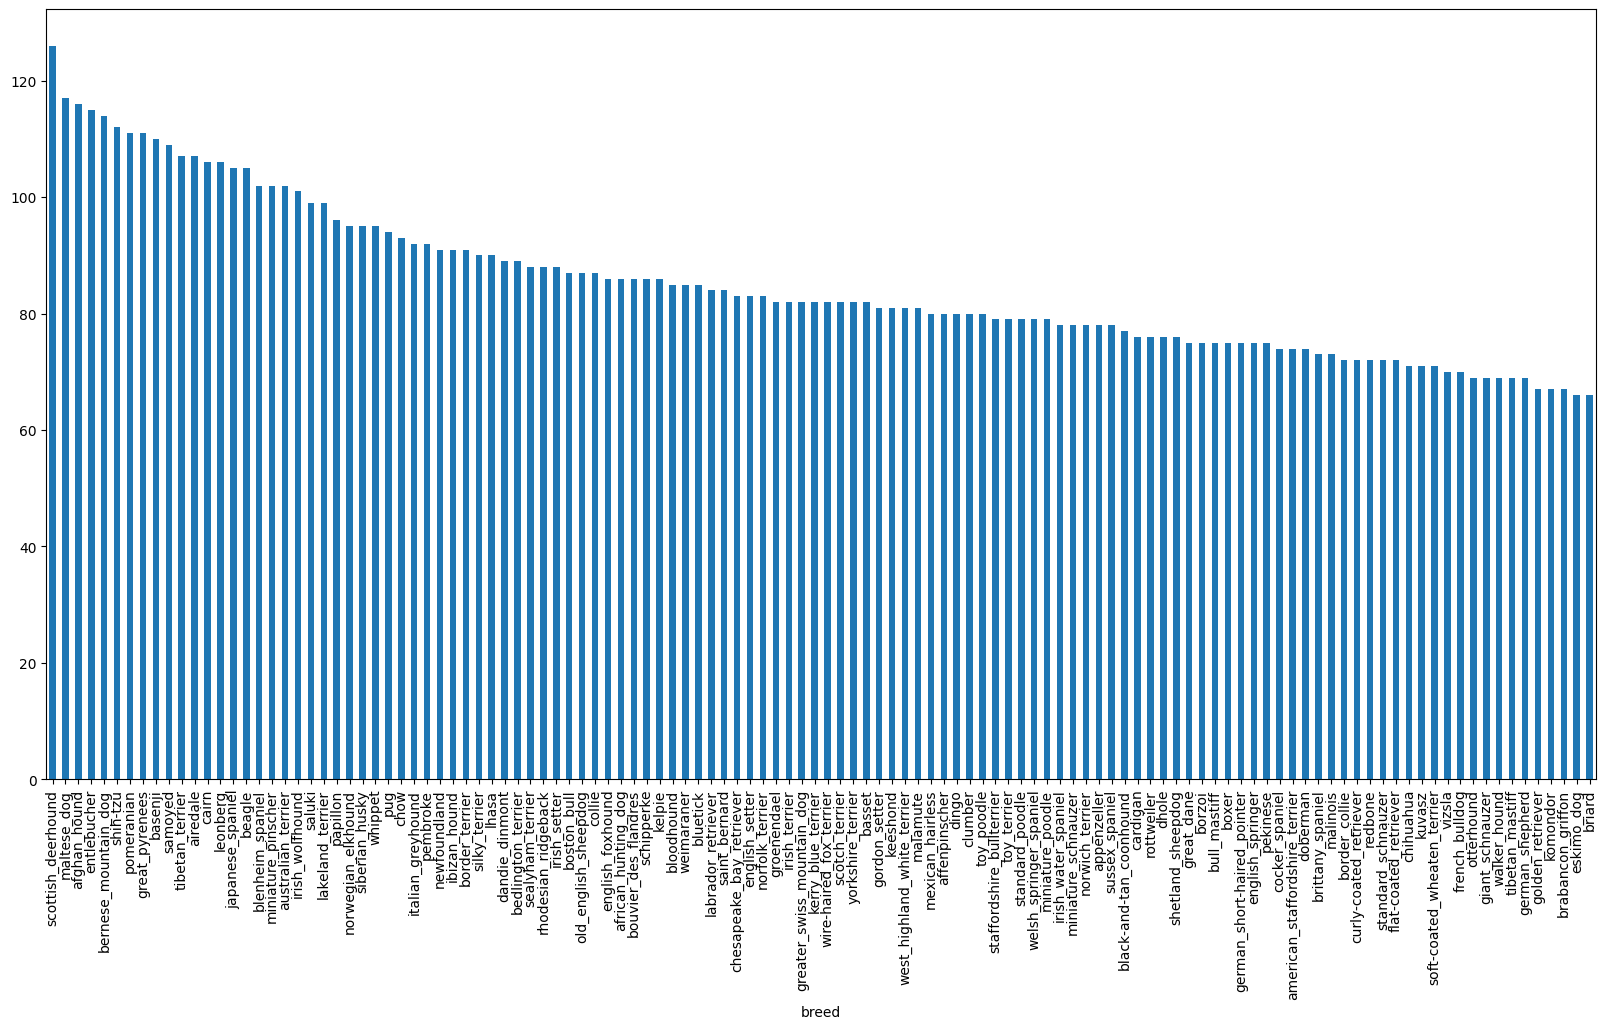

In [ ]:
label_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
label_csv['breed'].value_counts().median()

82.0

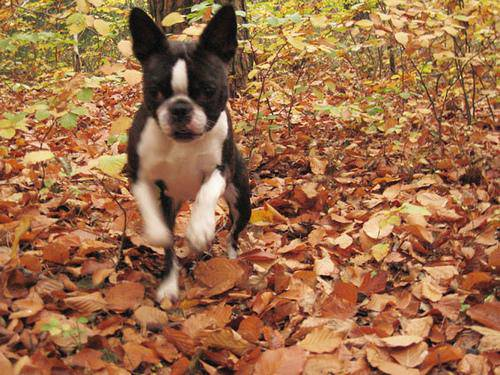

In [ ]:
from IPython.display import Image
Image("drive/MyDrive/Data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
filenames=["drive/MyDrive/Data/dog-breed-identification/train/"+fname+".jpg" for fname in label_csv["id"]]
filenames

['drive/MyDrive/Data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',

In [ ]:
import os
if len(os.listdir("drive/MyDrive/Data/dog-breed-identification/train/"))== len(filenames):
  print("Filenames match actual amoun of files !!! proceed")
else:
  print("Filenames do not match actual amoun of files the target directory")


Filenames match actual amoun of files !!! proceed


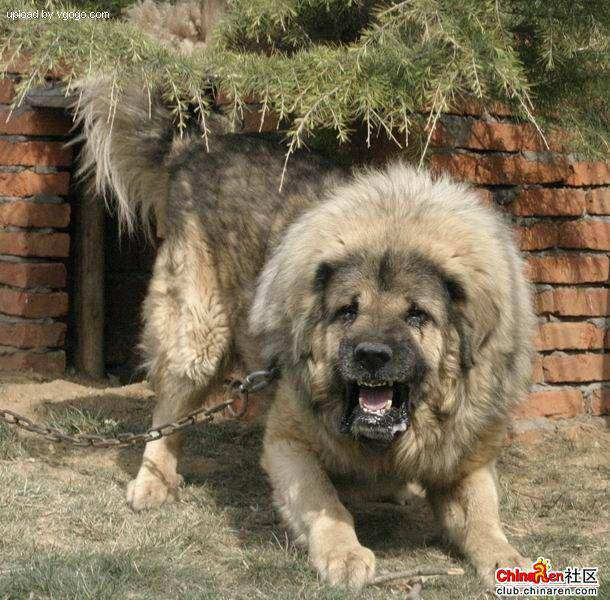

In [ ]:
Image(filenames[9000])

In [ ]:
import numpy as np
label=label_csv['breed'].to_numpy()
label

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
if len(label)==len(filenames):
  print("Numper of label matches number filnames")
else:
  print("Numper of label does not matches number filnames,check data directories")

Numper of label matches number filnames


In [ ]:
unique_breed=np.unique(label)
len(unique_breed)

120

In [ ]:
print(label[0])
label[0]==unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_label=[i==unique_breed for i in label]
boolean_label[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_label)

10222

In [ ]:
print(label[0])
print(np.where(unique_breed==label[0]))
print(boolean_label[0].argmax())
print(boolean_label[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_label[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
filenames[:10]

['drive/MyDrive/Data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Data/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
X=filenames
y=boolean_label

In [ ]:
NUM_IMAGES=1000 #@param {type:"slider",min:1000,max:10000,stop:1000}

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:5],y_train[:2]

(['drive/MyDrive/Data/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Data/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Data/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Data/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Data/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False

In [ ]:
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(),image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
tf.constant(image)[:2]

NameError: name 'tf' is not defined

In [ ]:
IMGE_SIZE=224
def process_image (image_path):
  """
  Takes in image file path and turns the imge into a Tensor.
  """
  image =tf.io.read_file(image_path)
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32 )
  image=tf.image.resize(image,size=[IMGE_SIZE,IMGE_SIZE])
  return image



In [ ]:
tensor=tf.io.read_file(filenames[26])


In [ ]:
def get_image_label (image_path,label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (iamge,label)
  """
  image=process_image(image_path)
  return image,label

In [ ]:
(process_image(X[42]),tf.constant(y[42]))

In [ ]:
BATCH_SIZE=32
def create_data_bathes(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Create batches of data out of image(X) and label (y) pairs
  Shuffles the data if it's training data but doesn't shuffle if it's validation data
  Also accepet test data as input (no label)
  """
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches..")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),#filepathe
                                             tf.constant(y)))#labels
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
     print("Creating training data batches...")
     data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))  # image and label pairs
     data = data.shuffle(buffer_size=len(X))  # Shuffle for training data
     data = data.map(get_image_label)
     data_batch = data.batch(BATCH_SIZE)
     return data_batch
    # data_batch=data.map(process_image).batch(BATCH_SIZE)




In [ ]:
train_data=create_data_bathes(X_train,y_train)
val_data=create_data_bathes(X_val,y_val,valid_data=True)


Creating training data batches...


NameError: name 'tf' is not defined

In [ ]:
train_data.element_spec,val_data.element_spec

In [ ]:
import matplotlib.pylab as plt
def show_25_images(images,labels):
  """
  Display a plot of 25 images and their labels from a data batch
  """
  plt.figure(figsize=(10,10))
  for i in range(24):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])
    plt.axis("off")

In [ ]:
train_data

In [ ]:
  unique_breed[y[0].argmax()]

In [ ]:
train_images,train_labels=next(train_data.as_numpy_iterator())

show_25_images(train_images,train_labels)

NameError: name 'train_data' is not defined

In [ ]:
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [ ]:
len(train_images),len(train_labels)

In [ ]:
IMGE_SIZE

In [ ]:

# Setup input shape to the model
INPUT_SHAPE = [None, IMGE_SIZE, IMGE_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breed)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

NameError: name 'INPUT_SHAPE' is not defined

In [ ]:
model=create_model()
model.summary()


In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
def create_tensorborad_callback():
  logdir=os.path.join("drive/MyDrive/Data/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

NameError: name 'tf' is not defined

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}


In [ ]:
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")


In [ ]:
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model
model = train_model()

In [ ]:
!pip install tensorboard

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir drive/My\Drive/Data/logs

<IPython.core.display.Javascript object>

In [ ]:
val_data

NameError: name 'val_data' is not defined

In [ ]:
# Make predictions on the validation data (not used to train on)

predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
predictions[0]


In [ ]:
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breed[np.argmax(predictions[index])]}")

NameError: name 'predictions' is not defined

In [ ]:
unique_breed[113]

In [ ]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breed[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

In [ ]:
val_data

In [ ]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

NameError: name 'val_data' is not defined

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

NameError: name 'predictions' is not defined

In [ ]:
predictions[0]

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]] #افضل عشرة

In [ ]:
predictions[0].max()

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

NameError: name 'model' is not defined

In [ ]:
loaded_1000_image_model = load_model("drive/MyDrive/Data/models/20250514-07281747207731-1000-images-mobilenetv2-Adam.h5")

In [ ]:
loaded_1000_image_model.evaluate(val_data)

In [ ]:
  len(X), len(y)

In [ ]:
full_data = create_data_bathes(X, y)

In [ ]:
full_data


In [ ]:

full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)


In [ ]:
teset_path="drive/MyDrive/Data/dog-breed-identification/test/"
test_folename=[teset_path + fname for fname in os.listdir(teset_path)]
test_folename[:10]

In [ ]:
len(test_folename)

In [ ]:
test_data=create_data_bathes(test_folename,test_data=True)

NameError: name 'test_folename' is not defined

In [ ]:
tesr_data